[ 0.925552  1.825552  5.375552  7.825552 10.275552 14.475552] 8
[1.3755519986154265, 3.600551998615458, 6.600551998615501, 9.050551998615536, 12.375551998615583]
[344.23481651 108.82636111  86.64121471  77.44099157  12.64614186]


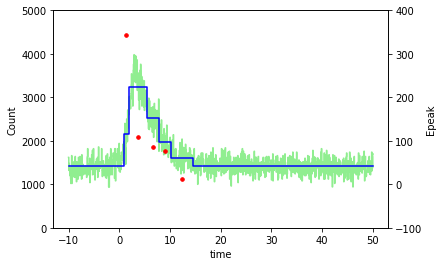

In [20]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import bayesian_blocks
import pandas as pd
bnname='bn090809978'
det=['n3','n4']
datafile='/home/yao/burstdownloadyears/2009/bn090809978'
file = glob(datafile+'/'+'glg_tte_'+det[0]+'_'+bnname+'_v*.fit') 
fitfile=file[0]
hdu=fits.open(fitfile)
data=hdu['events'].data['time']
trigtime=hdu[0].header['trigtime']
time=data-trigtime
tte=time[(time>-10)&(time<50)]
     
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() 

def bbduration(tte=tte,lcbinwidth=0.1,gamma=1e-300):
    edges=np.arange(tte[0],tte[-1]+lcbinwidth,lcbinwidth)
    histvalue, histbin =np.histogram(tte,bins=edges)
    plottime=histbin
    plotrate=histvalue/lcbinwidth
    plotrate=np.concatenate(([plotrate[0]],plotrate))
    ax1.plot(plottime,plotrate,linestyle='steps',color='lightgreen')
    edges = bayesian_blocks(plottime,plotrate,fitness='events',p0=1e-1, gamma=1e-300)
    histvalue, histbin =np.histogram(tte,bins=edges)
    plottime=histbin
    plotrate=histvalue/(histbin[1:]-histbin[:-1])
    plotrate=np.concatenate(([plotrate[0]],plotrate)) 
    ax1.plot(plottime,plotrate,linestyle='steps',color='b')
    ax1.set_xlabel('time')
    ax1.set_ylabel('Count')
    ax1.set_ylim(0,5000)
    l=len(edges)
    print(edges[1:-1],l)
    x=[]
    for i  in range(l-3):    
        s=(edges[i+1]+edges[i+2])/2
        x.append(s)
    print(x)
    df=pd.read_excel('epeak.xlsx')
    y=  df['E'].values
    yp1=df['error-p'].values
    yn1=df['error-n'].values
    yerr=[yn1,yp1]
    print(y)
    ax2.scatter(x,y,color='red', zorder=2,marker = '.',s=50.)    
    ax2.errorbar(x,y,yerr,zorder=1, fmt='o',color = '0.15',markersize=1e-50)
    ax2.set_ylabel('Epeak')
    ax2.set_ylim(-100,400)
bbduration(tte=tte,lcbinwidth=0.05,gamma=1e-300)
